In [1]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.cluster import KMeans
import pickle
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
# Load dataset
BBBP_ds = pd.read_csv('og_datasets/BBBP.csv')
# Load ogfps 
with open('Fingerprints/BBBP_full.pkl', 'rb') as f:
    BBBP_ogfps = pickle.load(f)
assert len(BBBP_ogfps) == len(BBBP_ds)

In [3]:
X = [BBBP_ogfps[i] for i in BBBP_ds['smiles']]
Y = BBBP_ds['p_np'].to_numpy()

In [4]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)

In [5]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)

In [6]:
kmeans.labels_

array([0, 1, 0, ..., 1, 1, 0], dtype=int32)

In [7]:
roc_auc_score(Y, kmeans.labels_)

0.8095158820443912

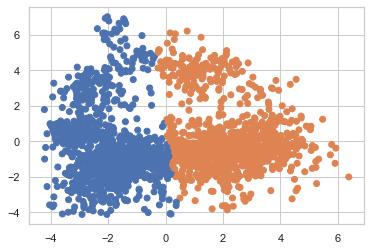

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=['C'+str(i) for i in kmeans.labels_])

In [12]:
# Load ftfps
with open('Fingerprints/fine-tuned/BBBP_full.pkl', 'rb') as f:
    BBBP_ftfps = pickle.load(f)
assert len(BBBP_ftfps) == len(BBBP_ds)

In [13]:
X = [BBBP_ftfps[i] for i in BBBP_ds['smiles']]
Y = BBBP_ds['p_np'].to_numpy()
pca = PCA(n_components=2)
X = pca.fit_transform(X)
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)
roc_auc_score(Y, kmeans.labels_)

0.9960930738933569

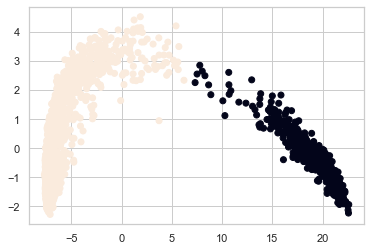

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)

## Clintox

In [45]:
# Load dataset
clintox_ds = pd.read_csv('og_datasets/clintox.csv')
# Load fps 
with open('Fingerprints/clintox_full.pkl', 'rb') as f:
    clintox_ogfps = pickle.load(f)
assert len(clintox_ogfps) == len(clintox_ds)

In [46]:
X = [clintox_ogfps[i] for i in clintox_ds['smiles']]
Y = clintox_ds['CT_TOX'].to_numpy()
pca = PCA(n_components=2)
X = pca.fit_transform(X)
kmeans = KMeans(n_clusters=2, random_state=4).fit(X)
roc_auc_score(Y, kmeans.labels_)

0.46647230320699706

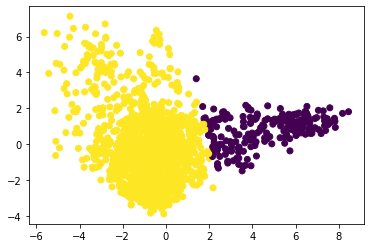

In [47]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)

In [63]:
# Load dataset
clintox_ds = pd.read_csv('og_datasets/clintox.csv')
# Load fps 
with open('Fingerprints/fine-tuned/clintox_full.pkl', 'rb') as f:
    clintox_ftfps = pickle.load(f)
assert len(clintox_ftfps) == len(clintox_ds)

In [64]:
X = [clintox_ftfps[i] for i in clintox_ds['smiles']]
Y = clintox_ds['CT_TOX'].to_numpy()
pca = PCA(n_components=2)
X = pca.fit_transform(X)
kmeans = KMeans(n_clusters=2, random_state=4).fit(X)
roc_auc_score(Y, kmeans.labels_)

0.9996355685131195

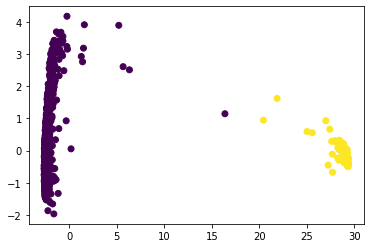

In [65]:
plt.scatter(X[:, 0], X[:, 1], c=clintox_ds['CT_TOX'].tolist())

## HIV

In [68]:
# Load dataset
hiv_ds = pd.read_csv('og_datasets/HIV.csv')
# Load fps 
with open('Fingerprints/HIV_full.pkl', 'rb') as f:
    hiv_ogfps = pickle.load(f)
assert len(hiv_ogfps) == len(hiv_ds)

In [69]:
X = [hiv_ogfps[i] for i in hiv_ds['smiles']]
Y = hiv_ds['HIV_active'].to_numpy()
pca = PCA(n_components=2)
X = pca.fit_transform(X)
kmeans = KMeans(n_clusters=2, random_state=4).fit(X)
roc_auc_score(Y, kmeans.labels_)

0.5291297088998934

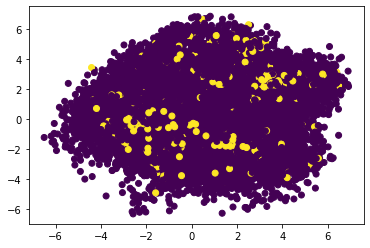

In [70]:
plt.scatter(X[:, 0], X[:, 1], c=hiv_ds['HIV_active'].tolist())

In [35]:
# Load dataset
hiv_ds = pd.read_csv('og_datasets/HIV.csv')
# Load fps 
with open('Fingerprints/fine-tuned/HIV_full.pkl', 'rb') as f:
    hiv_ftfps = pickle.load(f)
assert len(hiv_ftfps) == len(hiv_ds)

In [36]:
X = [hiv_ftfps[i] for i in hiv_ds['smiles']]
Y = hiv_ds['HIV_active'].to_numpy()
pca = PCA(n_components=2)
X = pca.fit_transform(X)
kmeans = KMeans(n_clusters=2).fit(X)
roc_auc_score(Y, kmeans.labels_)

0.9733385428879836

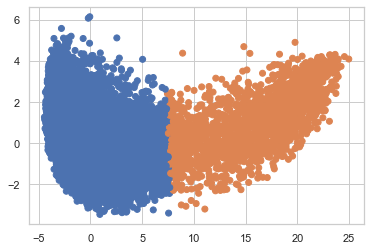

In [37]:
plt.scatter(X[:, 0], X[:, 1], c=['C'+str(i) for i in kmeans.labels_])

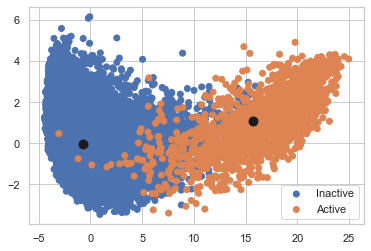

In [38]:
labels = hiv_ds['HIV_active'].tolist()
colours = np.array(['C'+str(i) for i in hiv_ds['HIV_active'].tolist()])
l = {0: 'Inactive', 1:'Active'}
for label in np.unique(labels):
    i = np.where(labels == label)
    plt.scatter(X[i, 0], X[i, 1], c=colours[i], label=l[label])
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.savefig('hiv_kmeans', dpi=600)
plt.show()